# Project: Investigate a Dataset - [TMDB Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information for 10,866 movies collected from The Movie Database (TMDb), including (IMDB ID, Popularity, Budget, Revenue, Movie Title, Cast, Homepage URL, Director, Tagline, Keywords, Overview, Runtime, Genres, Production Companies, Release Date, Vote Count, Vote Average, Release Year, Budget Adj and Revenue Adj.

### Question(s) for Analysis
1.**Movies with most and least profit**

2.**Movies with highest and lowest budget**

3.**Movies with longest and shortest runtime duration**

4.**Average Vote for Top 20 Directors**

5.**Movies Produced per Year**

6.**Top 10 Movies and its directors**

7.**Rating Vs. Revenue**

8.**Properties Asscoiated with high revenue movies**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

**Loading Data..**

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

**Checking Dataframe** ... (Displaying first 10 Rows)

In [4]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

**Checking Dataframe** ... (Displaying Last 10 Rows)

In [5]:
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


**Checking Number of Rows, Columns...**

In [6]:
df.shape

(10866, 21)

**Getting General Info...**
 - Total Number of Rows
 - Total Number of Columns
 - General Info about missing values
 - Datatype of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Getting General Caluculations ...**

In [8]:
#using describe method for some statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**we can see that (budget, revenue, runtime, budget_adj, revenue_adj) all has 0 values as min which is misleading.**

**we'll drop those values later**

**Checking Missing Values**

In [9]:
#missing values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#total missing values
df.isnull().sum().sum()

13434

**Checking for Duplicates...**

In [11]:
df.duplicated().sum()

1


### Data Cleaning
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


**Dropping Null Values...**

In [13]:
df.dropna(axis=0, inplace=True)

**Dropping Duplicates...**

In [14]:
df.drop_duplicates(inplace=True)

**Dropping Not Needed Columns...**

In [15]:
df.drop(['id','imdb_id','cast','homepage','tagline','keywords','overview'],axis=1, inplace=True)

**Checking Dataset**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
director                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null float64
revenue_adj             1992 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 233.4+ KB


 **Converting 'release_date' datatype from string to datetime...**

In [17]:
df['release_date'] = pd.to_datetime(df['release_date'])

**Checking 'release_date' Datetype..**

In [18]:
#'release_date' should appear as datetime instead of object/string
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 14 columns):
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
director                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null float64
revenue_adj             1992 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 233.4+ KB


**Overview Histograms of our Dataset...**

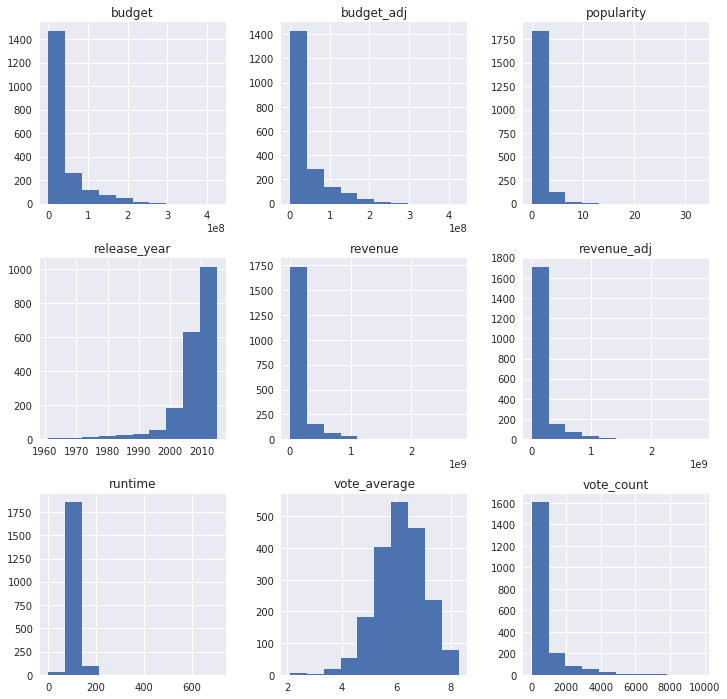

In [19]:
df.hist(figsize=(12,12));

**Replacing 0 values in 'budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj' with NaN values...**

In [20]:
columns = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[columns] = df[columns].replace(['0',0], np.nan)

**Dropping those NaN values we just convetred from 0 values**

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
#checking if min in (budget, revenue, runtime, budget_adj, revenue_adj) is still 0
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 14 columns):
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
director                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-null float64
revenue_adj             1287 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 150.8+ KB


**Changing Datatype of 'budget' and 'revenue'**

In [24]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].applymap(np.int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 14 columns):
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
director                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-null float64
revenue_adj             1287 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 150.8+ KB


**Splitting 'genres' column so we can apply analysis on individual genres...**

In [26]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy',
       'Action|Crime|Thriller', 'Western|Drama|Adventure|Thriller',
       'Science Fiction|Action|Thriller|Adventure',
       'Drama|Adventure|Science Fiction',
       'Family|Animation|Adventure|Comedy', 'Comedy|Animation|Family',
       'Action|Adventure|Crime',
       'Science Fiction|Fantasy|Action|Adventure',
       'Drama|Science Fiction', 'Action|Comedy|Science Fiction',
       'Action|Adventure|Science Fiction', 'Crime|Drama|Mystery|Western',
       'Crime|Action|Thriller', 'Science Fiction|Action|Adventure',
       'War|Adventure|Science Fiction',
       'Action|Family|Science Fiction|Adventure|Mystery',
       'Action|Drama|Thriller', 'Drama|Romance', 'Comedy|Drama', 'Action',
       'Crime|Comedy|Action|Adventure', 'Drama|Thriller|History',
       'Action|Science Fiction|Thriller', 'Crime|Action|Science Fiction',
       'Adventu

In [27]:
df['genres'] = df['genres'].str.split('[|]', expand=True)

In [28]:
#checking the remaining genres we're gonna analyze the dataset by.
df['genres'].unique()


array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'War', 'Fantasy', 'Thriller',
       'Romance', 'Mystery', 'Horror', 'History', 'Animation',
       'Documentary', 'Music'], dtype=object)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 14 columns):
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
director                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-null float64
revenue_adj             1287 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 150.8+ KB


**Checking the last version of the clean dataset we're going to work with...**

In [30]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137.0,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1. Highest and Lowest Insights?

In [31]:
#cheking the dataset columns' names we're going to use in analysis.
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

**Movies with most and least profit**

In [32]:


import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

**Inserting ```profit_earned``` new column**

In [33]:
df.insert(3,'profit_earned',df['revenue']-df['budget'])
df.head()

,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,185238201,Insurgent,Robert Schwentke,119.0,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,1316249360,Furious 7,James Wan,137.0,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
calculate('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action,Adventure
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


**We find the id 1386 with original_title 'Avatar' has the highest earned_profit.**

**And the id 2244 with original_title'The Warrior's Way' has the lowest earned_profit**

<function matplotlib.pyplot.show(*args, **kw)>

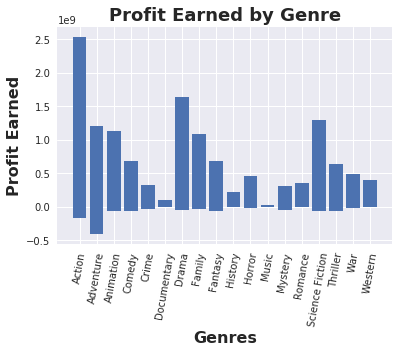

In [35]:
plt.bar(df['genres'], df['profit_earned'])
plt.xticks(rotation = 80)
plt.title("Profit Earned by Genre", fontsize = 18, fontweight = "bold") 
plt.ylabel("Profit Earned", fontsize = 16 , fontweight = "bold")
plt.xlabel('Genres',fontsize = 16, fontweight = "bold");
plt.show


**By Genres we see that Action Movies is the most profitable genre.**

**Documentary and Music have nearly no profit.**

**While Adventrue movies genre sometimes are rewarding and other times is a losing risk.**

**Movies with highest and lowst budget**

In [36]:
calculate('budget')


,2244,3581
popularity,0.25054,0.52043
budget,425000000,1
revenue,11087569,1378
profit_earned,-413912431,1377
original_title,The Warrior's Way,"Love, Wedding, Marriage"
director,Sngmoo Lee,Dermot Mulroney
runtime,100,90
genres,Adventure,Comedy
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
release_date,2010-12-02 00:00:00,2011-06-03 00:00:00


**We find the id 2244 with original_title 'The Warrior's Way' has the highest budget.**

**and the id 3581 with original_title "Love, Wedding, Marriage" has the lowest budget with just 1 which requires more investigation.**

**Movies with longest and shortest runtime duration**

In [37]:
calculate('runtime')


,4949,3424
popularity,7.12246,1.42534
budget,94000000,30000000
revenue,1118888979,14460000
profit_earned,1024888979,-15540000
original_title,The Lord of the Rings: The Return of the King,Winnie the Pooh
director,Peter Jackson,Stephen Anderson|Don Hall
runtime,201,63
genres,Adventure,Animation
production_companies,WingNut Films|New Line Cinema,Walt Disney Pictures|Walt Disney Animation Stu...
release_date,2003-12-01 00:00:00,2011-04-13 00:00:00


**We find id 4949 with original_title 'The Lord of the Rings: The Return of the King' has the longest runtime with 201 minutes.**

**and id 3424 with original_title 'Winnie the Pooh' has the shortest runtime with 63 minutes.**

**Average Vote for Top 20 Directors**

In [38]:
Top_20 = df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(20)
Top_20

director
Damien Chazelle                   8.200000
Morten Tyldum                     8.000000
Pete Docter                       8.000000
Lenny Abrahamson                  8.000000
Tony Kaye                         8.000000
Denis Villeneuve                  7.800000
Richard Marquand                  7.800000
Lilly Wachowski|Lana Wachowski    7.800000
Lucy Walker                       7.800000
Rajkumar Hirani                   7.800000
Don Hall|Chris Williams           7.800000
Christopher Nolan                 7.785714
Giuseppe Tornatore                7.700000
Roger Allers|Rob Minkoff          7.700000
Sean Penn                         7.700000
Dean DeBlois                      7.700000
Mark Herman                       7.600000
Joel Coen                         7.600000
Stephen Chbosky                   7.600000
Charles Ferguson                  7.600000
Name: vote_average, dtype: float64

Text(0,0.5,'Director Name')

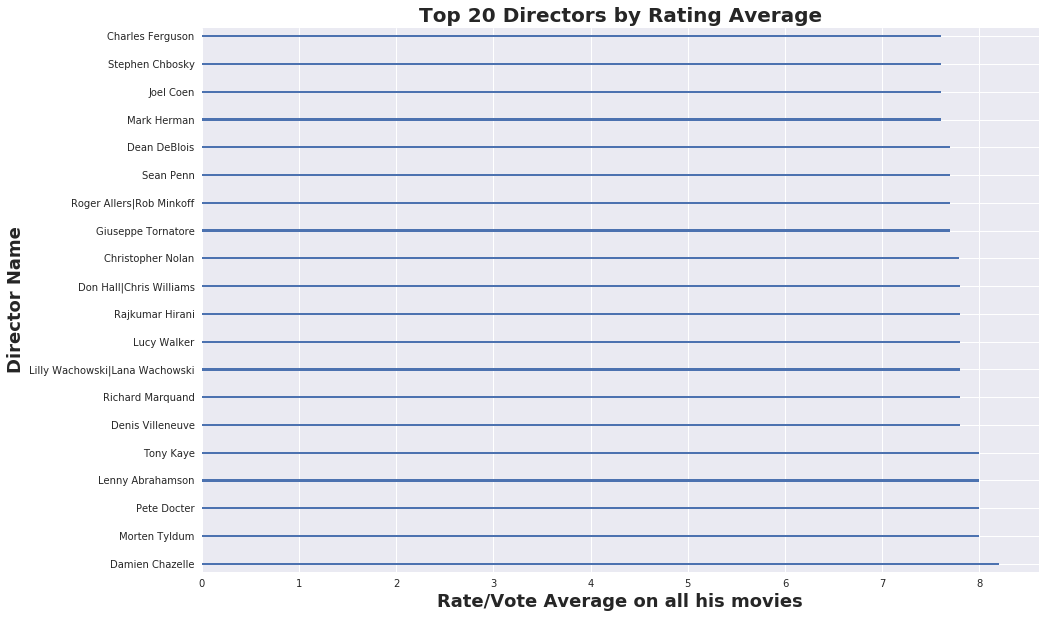

In [39]:
Top_20.plot(kind='barh',stacked=True, figsize=(15,10),width=0.08)
plt.title('Top 20 Directors by Rating Average', fontsize = 20, fontweight = 'bold')
plt.xlabel('Rate/Vote Average on all his movies', fontsize = 18, fontweight = 'bold')
plt.ylabel('Director Name', fontsize = 18, fontweight = 'bold')

**We find that the diffrence in vote mean is not huge between the first 20 directors, as the highest with 8.2 rate and the 20th with 7.6 rate.**

### Question 2 . Movies Produced per Year

In [40]:
df['release_year'].value_counts()

2011    156
2010    132
2009    116
2015     93
2007     92
2012     88
2008     82
2014     70
2006     68
2013     65
2005     51
2004     43
2003     30
2002     24
1999     22
2001     18
2000     14
1996     13
1998     11
1997      8
1995      8
1993      7
1981      6
1994      5
1992      5
1983      5
1971      4
1984      4
1979      4
1990      4
1987      4
1989      4
1982      3
1975      3
1985      2
1988      2
1980      2
1978      2
1977      2
1973      2
1991      2
1964      2
1965      1
1962      1
1963      1
1974      1
1967      1
1969      1
1972      1
1986      1
1961      1
Name: release_year, dtype: int64

In [41]:
def countplot(col, xlabel, ylabel, title):
    count = col.value_counts()
    plt.bar(count, count.values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

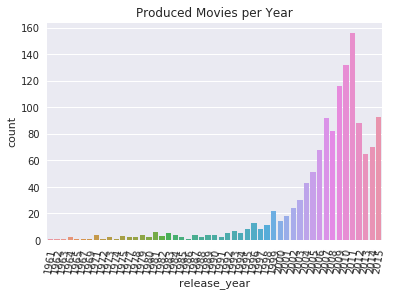

In [42]:
sns.countplot(x='release_year', data=df,)
sns.set(rc={'figure.figsize':(15,15)})
plt.xticks(rotation=80)
plt.title('Produced Movies per Year')
plt.show()

**We find that after 2000 the movies production increased drastically with almost triple and five times than the highest year before 2000 which was 1999 with 22 movies, and the highest year is 2011 with 156 movies. and the lowest prodoction was in the years 1961, 1962, 1963, 1965, 1967, 1969, 1972, 1974, 1986  by one movie each**

**Display Top 10 movies and its directors**

In [43]:
top_10 = df.nlargest(10,'vote_average')[['original_title','vote_average','director']].set_index('original_title')
top_10

,vote_average,director
original_title,,
The Godfather,8.3,Francis Ford Coppola
Whiplash,8.2,Damien Chazelle
Fight Club,8.1,David Fincher
The Dark Knight,8.1,Christopher Nolan
Schindler's List,8.1,Steven Spielberg
Inside Out,8.0,Pete Docter
Room,8.0,Lenny Abrahamson
Interstellar,8.0,Christopher Nolan
The Imitation Game,8.0,Morten Tyldum


Text(0.5,1,'Top 10 Movies with Average and Director Names')

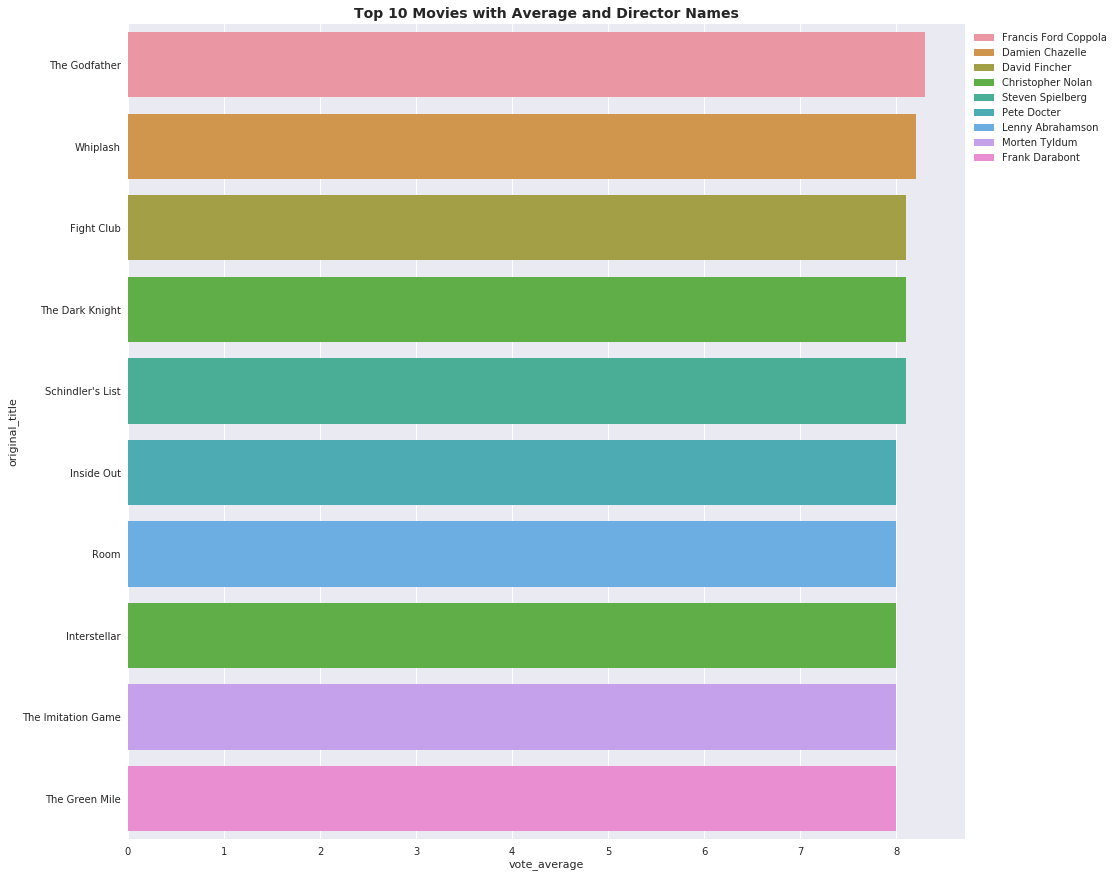

In [50]:
sns.barplot(x='vote_average', y = top_10.index, data = top_10, hue='director', dodge=False)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.title('Top 10 Movies with Average and Director Names', fontsize = 14, fontweight = 'bold')

**Rating Vs. Revenue**

Text(0.5,1,'Rating vs Revenue')

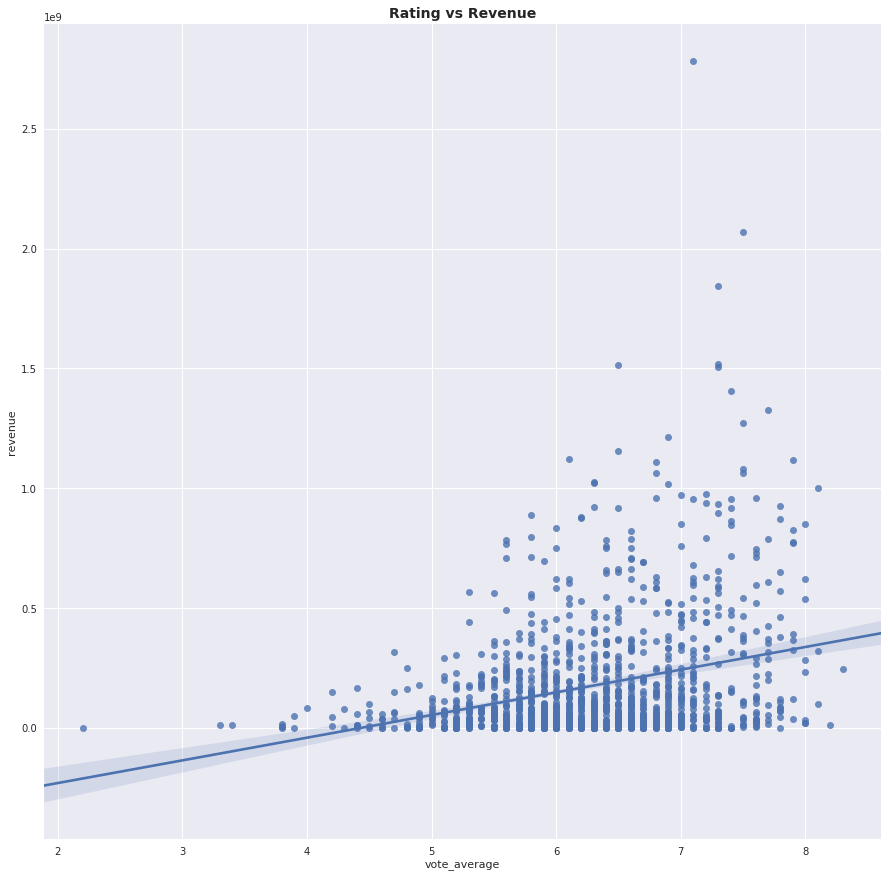

In [51]:
sns.regplot(x='vote_average', y='revenue', data=df)
plt.title('Rating vs Revenue', fontsize = 14, fontweight='bold')

**We find that there is a positive correlation between revenue and vote_average, and no movie with low vote average achieved a good revenue.**

**properties are associated with movies that have high revenues**

In [46]:
revenue_sort = df.sort_values('revenue', ascending= False).head(200)
revenue_sort.head()

,popularity,budget,revenue,profit_earned,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,2544505847,Avatar,James Cameron,162.0,Action,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,1645034188,Titanic,James Cameron,194.0,Drama,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,1299557910,The Avengers,Joss Whedon,143.0,Science Fiction,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


Text(0,0.5,'Revenue')

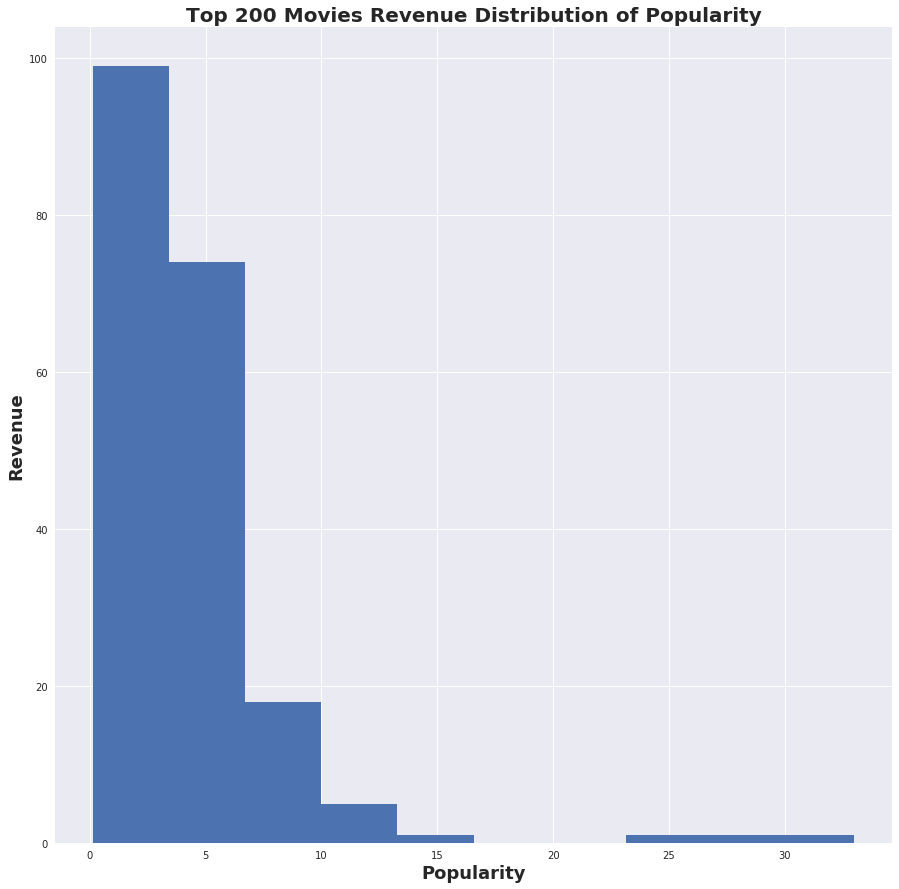

In [53]:
revenue_sort['popularity'].hist()
plt.title('Top 200 Movies Revenue Distribution of Popularity', fontsize = 20, fontweight = 'bold')
plt.xlabel('Popularity', fontsize = 18, fontweight = 'bold')
plt.ylabel('Revenue', fontsize = 18, fontweight = 'bold')

Text(0,0.5,'Frequency')

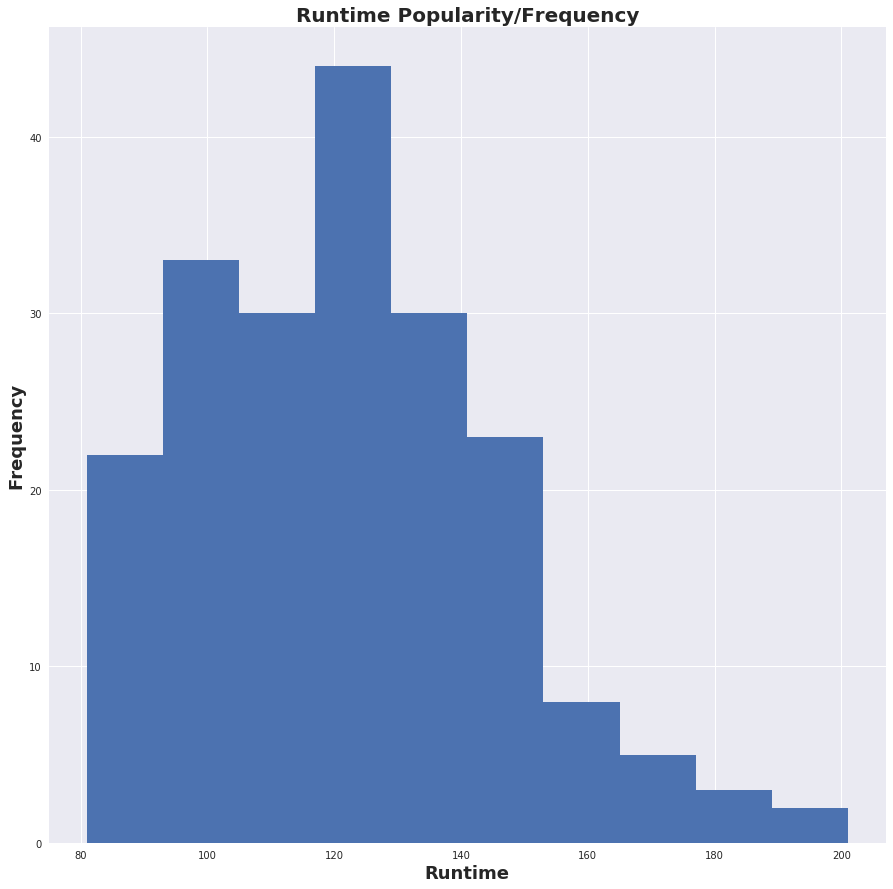

In [48]:
revenue_sort['runtime'].hist()
plt.title('Runtime Popularity/Frequency', fontsize = 20, fontweight = 'bold')
plt.xlabel('Runtime', fontsize = 18, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 18, fontweight = 'bold')

**We find that the most revenued movies popularity is 2.5 approximately**

**We find that the run time for the most revenued movies is between 100-130 min.**



<a id='conclusions'></a>
## Conclusions
**We find the id 1386 with original_title 'Avatar' has the highest earned_profit.**

**And the id 2244 with original_title'The Warrior's Way' has the lowest earned_profit**

**By Genres we see that Action Movies is the most profitable genre.**

**Documentary and Music have nearly no profit.**

**While Adventrue movies genre sometimes are rewarding and other times is a losing risk.**

**We find the id 2244 with original_title 'The Warrior's Way' has the highest budget.**

**and the id 3581 with original_title "Love, Wedding, Marriage" has the lowest budget with just 1 which requires more investigation.**

**We find id 4949 with original_title 'The Lord of the Rings: The Return of the King' has the longest runtime with 201 minutes.**

**and id 3424 with original_title 'Winnie the Pooh' has the shortest runtime with 63 minutes.**

**We find that the diffrence in vote mean is not huge between the first 20 directors, as the highest with 8.2 rate and the 20th with 7.6 rate.**

**We find that after 2000 the movies production increased drastically with almost triple and five times than the highest year before 2000 which was 1999 with 22 movies, and the highest year is 2011 with 156 movies. and the lowest prodoction was in the years 1961, 1962, 1963, 1965, 1967, 1969, 1972, 1974, 1986  by one movie each**

**We find that there is a positive correlation between revenue and vote_average, and no movie with low vote average achieved a good revenue.**

**We find that the most revenued movies popularity is 2.5 approximately**

**We find that the run time for the most revenued movies is between 100-130 min.**




# Limitations

**Rows with NaN limited the analysis and almost downsized it by 10 times, as the original dataset contained 10866 entries and after cleaning it became only 1287 which is around 90% cut**

**This amonut of data of course would have changed most of the analysis especially revenue analysis, release_year analysis and profitability.**

**Revenue and Budget has no unit which may demolish the whole analysis if these were in different currencies.**




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0